In [59]:
import requests
import xmltodict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

url='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey=KGo%2Fpd2kwY2o1qOV46jyY0nVecBEd7bqMB5z7%2B%2BSiLyE04YdRARMtIK%2FyXitD18%2FiZPkdQl91VSnM7ohVX3NIQ%3D%3D&pageNo=1&numOfRows=10&startCreateDt=20200201&endCreateDt=20200831'

last_dcd = 0
last_date = 0
result = []

req=requests.get(url).content
xmlObject=xmltodict.parse(req)
data=xmlObject['response']['body']['items']['item']
for i in range(len(data)):
    if int(data[len(data)-i-1]['stateDt'])==last_date:
        result[-1] += int(data[len(data)-i-1]['decideCnt']) - last_dcd
        last_dcd = int(data[len(data)-i-1]['decideCnt'])
        last_date = int(data[len(data)-i-1]['stateDt'])

    else:
        result.append(int(data[len(data)-i-1]['decideCnt']) - last_dcd)
        last_dcd=int(data[len(data)-i-1]['decideCnt'])
        last_date=int(data[len(data)-i-1]['stateDt'])

print(len(result))

212


In [60]:

url2='http://data4library.kr/api/loanItemSrch?authKey=35c3bfc58502e41b21e1c4ac301a8056cbf1902fccd78698b85a20c2bbbb3fdb&'
Dt=['2020','-','02','-','01']
result2=[]
total_cnt=0
x=['03','05','07','08']
y=['04','06']
idx=1 #주 확인용 인덱스

while True:
    str_Dt = "".join(Dt)
    new_url2=url2+'startDt='+str_Dt+'&endDt='+str_Dt
    req2 = requests.get(new_url2).content
    xmlObject2 = xmltodict.parse(req2)
    data2 = xmlObject2['response']['docs']['doc']

    if str_Dt == '2020-08-31': #전체 프로그램 종료조건
        break

    for i in range(len(data2)):
        loan_cnt=data2[i]['loan_count'].replace(',','') #int로 바꾸기 위해 , 제거
        total_cnt += int(loan_cnt)

    result2.append(int(total_cnt))

    if idx == 28:  # 2월과 2월이 아닌 달 구분
        if Dt[2] == '02':  # 2월
            year = int(Dt[0])
            if ((year % 4 == 0) and (year % 100 != 0)) or (year % 400 == 0):  # 윤년이면 29일까지 있음
                idx += 1
                Dt[4] = '29'
            else:  # 윤년이 아닌 연도는 28일까지 있으므로 3월로 넘김
                idx = 1
                Dt[2] = '03'
                Dt[4] = '01'

        else:  # 2월이 아닌 달 중 마지막 날이 30일인 날과 31일인 날 구분
            idx += 1
            Dt[4] = '29'


    elif ((idx == 30) and (Dt[2] in y)) or ((idx == 31) and (Dt[2] in x)) or (Dt[2]=='02' and idx==29):  # 다음달로 월 변경
        idx = 1
        Dt[2] = '0' + str(int(Dt[2]) + 1)
        Dt[4] = '01'

    else:  # 일 변경
        if idx >= 9:  # 계산을 위해 int로 변환하면서 앞에 0이 없어졌기 때문에 다시 붙여준다
            Dt[4] = str(int(Dt[4])+1)  # 시작 일이 8일일 때
        else:
            Dt[4] = '0' + str(int(Dt[4]) + 1)
        idx += 1

    total_cnt=0

print(result2)
print(len(result2))

[10498, 8811, 3985, 9757, 7630, 6900, 5457, 7064, 6533, 2838, 8275, 5871, 6992, 5897, 8055, 6452, 3485, 9144, 7368, 6376, 5394, 5769, 4219, 1678, 1669, 1239, 788, 625, 711, 246, 539, 977, 815, 778, 827, 797, 728, 726, 1151, 1179, 1287, 1220, 938, 761, 1013, 2182, 2070, 1780, 1888, 1455, 972, 1548, 3153, 2483, 2207, 2390, 1671, 985, 1299, 2719, 2852, 2742, 2450, 1934, 1018, 1540, 3159, 3319, 3062, 3554, 2360, 1040, 1667, 3363, 566, 3553, 3550, 2647, 1341, 1884, 3957, 3668, 3374, 3411, 2625, 1213, 2027, 4392, 4032, 657, 2544, 2201, 1283, 1488, 450, 6861, 5862, 4780, 4536, 3806, 3515, 7989, 6873, 5780, 4581, 6808, 5011, 2402, 6520, 7301, 5996, 5670, 7254, 5880, 2547, 7174, 7646, 6164, 7134, 4242, 3685, 1192, 4372, 4065, 3717, 3382, 573, 5325, 1658, 4704, 4318, 3781, 3714, 5298, 4194, 1770, 5343, 4922, 4454, 4412, 5345, 4227, 1654, 5221, 4778, 4714, 5071, 5961, 4425, 2131, 5754, 6217, 5449, 4804, 6164, 4518, 2446, 6214, 5643, 5771, 4663, 6224, 4788, 2246, 7146, 6513, 5940, 5640, 6850, 5133

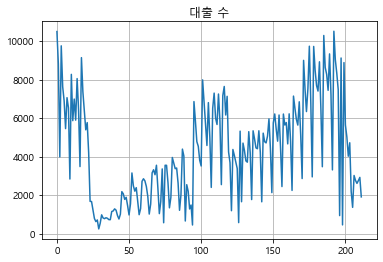

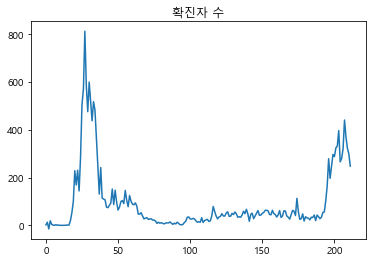

          dc        lc
dc  1.000000 -0.368862
lc -0.368862  1.000000


In [65]:
%matplotlib inline
data={
    'dc':result2,
    'lc':result
}
dataset=pd.DataFrame(data)
linear_regression=linear_model.LinearRegression(normalize=False,fit_intercept=True)
observations=len(dataset)
X=dataset['dc'].values
y=dataset['lc'].values.reshape((observations,1))

linear_regression.fit(y,X)
plt.rc('font', family='Malgun Gothic') # For Windows
plt.title('대출 수')
#plt.xlabel('dc')
#plt.ylabel('lc')
#plt.plot(y,X)
plt.grid(True)
#plt.plot(y,linear_regression.predict(y),color='r')
plt.plot(X)
plt.show()

plt.title('확진자 수')
plt.plot(y)
plt.show()


corr=dataset.corr(method='pearson')
print(corr)

In [87]:
import statsmodels.api as sm
import statsmodels.formula as smf

Xc=sm.add_constant(X)
linear_regression=sm.OLS(y,Xc)
fitted_model=linear_regression.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     33.07
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           3.11e-08
Time:                        10:58:30   Log-Likelihood:                -1324.5
No. Observations:                 212   AIC:                             2653.
Df Residuals:                     210   BIC:                             2660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.1834     16.680     10.562      0.000     143.301     209.066
x1            -0.0191      0.003     -5.751      0.000      -0.026      -0.013
==============================================================================
Omnibus:                      100.914   Durbin-Watson:                   0.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.584
Skew:                           2.027   Prob(JB):                     7.44e-77
Kurtosis:                       7.822   Cond. No.                     9.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

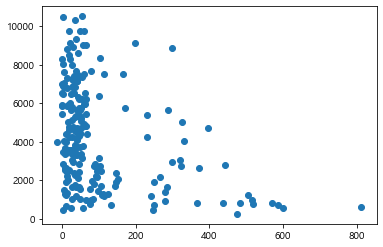

In [86]:
plt.scatter(y,X)
plt.show()

In [47]:
import requests
import xmltodict
import re

url3='http://data4library.kr/api/loanItemSrch?authKey=35c3bfc58502e41b21e1c4ac301a8056cbf1902fccd78698b85a20c2bbbb3fdb&'
#결과 저장할 폴더
m_cnt=0 #월별 대출수
w_cnt=0 #주별 대출수
idx=1 #주 확인용 인덱스
result=[] #결과 값 저장
result3=[]
x=['03','05','07','08']
y=['04','06']
for j in range(2016,2021):
    startDt=[str(j),'-','02','-','01'] #시작날짜
    endDt=[str(j),'-','02','-','07'] #종료날짜
    

    while True:
        str_startDt="".join(startDt)
        str_endDt="".join(endDt)
        new_url3=url3+'startDt='+str_startDt+'&endDt='+str_endDt

        print(str_startDt,str_endDt) #시작날,종료날 확인
        req=requests.get(new_url3).content
        xmlObject=xmltodict.parse(req)
        data=xmlObject['response']['docs']['doc']

        for i in range(len(data)):
            loan_cnt=data[i]['loan_count'].replace(',','') #int로 바꾸기 위해 , 제거
            w_cnt+=int(loan_cnt)
        #print(total_cnt) 1주일 동안 대출된 도서 수

        if (startDt[2]=='02') and (idx == 5): #2월 29일
            temp=result[3][1] #2월 넷째주 대출수
            w_cnt+=temp
            result[3]=[startDt[2]+'-'+str(idx-1),w_cnt] #2월 넷째주에 합치기
            #print(result)

        else:
            result.append([startDt[2]+'-'+str(idx),w_cnt])
            #print(result)
        m_cnt+=w_cnt
        w_cnt=0 #대출수 초기화

        if str_endDt == str(j)+'-08-31': #전체 프로그램 종료조건
            result3[j-2016].append(m_cnt)
            m_cnt=0
            break

        if idx == 4: #2월과 2월이 아닌 달 구분
            if startDt[2] == '02': #2월
                year=int(startDt[0])
                if ((year%4==0)and(year%100!=0))or(year%400==0): #윤년이면 29일까지 있음
                    idx+=1
                    startDt[4]='29'
                    endDt[4]='29'
                else: #윤년이 아닌 연도는 28일까지 있으므로 3월로 넘김 
                    idx=1
                    startDt[2]='03'
                    startDt[4]='01'
                    endDt[2]='03'
                    endDt[4]='07'
                    result3.append([m_cnt])
                    print(result3)
                    m_cnt=0
            else: #2월이 아닌 달 중 마지막 날이 30일인 날과 31일인 날 구분
                idx+=1
                startDt[4]='29'
                if startDt[2] in x:
                    endDt[4]='31'
                if startDt[2] in y:
                    endDt[4]='30'

        elif idx == 5: #다음달로 월 변경
            if startDt[2]=='02':
                idx=1
                startDt[2]='0'+str(int(startDt[2])+1)
                startDt[4]='01'
                endDt[2]=startDt[2]
                endDt[4]='07'
                result3.append([m_cnt])
                m_cnt=0
            
            else:
                idx=1
                startDt[2]='0'+str(int(startDt[2])+1)
                startDt[4]='01'
                endDt[2]=startDt[2]
                endDt[4]='07'
                result3[j-2016].append(m_cnt)
                m_cnt=0

        else: # 일 변경
            startDt[4]=str(int(startDt[4])+7)
            endDt[4]=str(int(endDt[4])+7)
            if idx == 1: #계산을 위해 int로 변환하면서 앞에 0이 없어졌기 때문에 다시 붙여준다
                startDt[4]='0'+startDt[4] #시작 일이 8일일 때 
            idx+=1
        
    idx=1

print(result3)

2016-02-01 2016-02-07
2016-02-08 2016-02-14
2016-02-15 2016-02-21
2016-02-22 2016-02-28
2016-02-29 2016-02-29
2016-03-01 2016-03-07
2016-03-08 2016-03-14
2016-03-15 2016-03-21
2016-03-22 2016-03-28
2016-03-29 2016-03-31
2016-04-01 2016-04-07
2016-04-08 2016-04-14
2016-04-15 2016-04-21
2016-04-22 2016-04-28
2016-04-29 2016-04-30
2016-05-01 2016-05-07
2016-05-08 2016-05-14
2016-05-15 2016-05-21
2016-05-22 2016-05-28
2016-05-29 2016-05-31
2016-06-01 2016-06-07
2016-06-08 2016-06-14
2016-06-15 2016-06-21
2016-06-22 2016-06-28
2016-06-29 2016-06-30
2016-07-01 2016-07-07
2016-07-08 2016-07-14
2016-07-15 2016-07-21
2016-07-22 2016-07-28
2016-07-29 2016-07-31
2016-08-01 2016-08-07
2016-08-08 2016-08-14
2016-08-15 2016-08-21
2016-08-22 2016-08-28
2016-08-29 2016-08-31
2017-02-01 2017-02-07
2017-02-08 2017-02-14
2017-02-15 2017-02-21
2017-02-22 2017-02-28
[[208009, 173074, 169012, 167450, 172691, 209790, 223654], [188652]]
2017-03-01 2017-03-07
2017-03-08 2017-03-14
2017-03-15 2017-03-21
2017-03

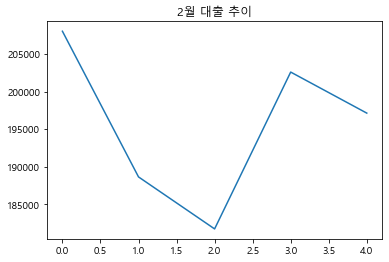

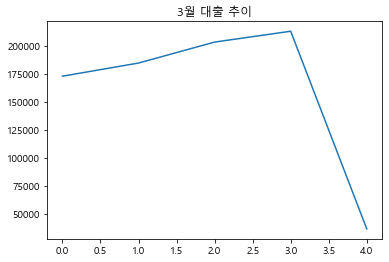

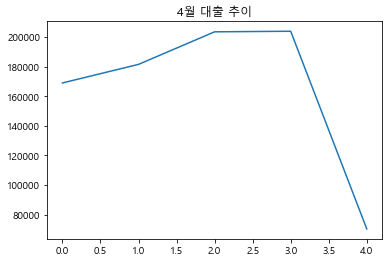

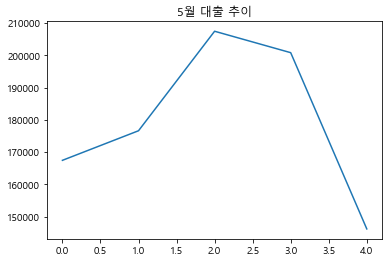

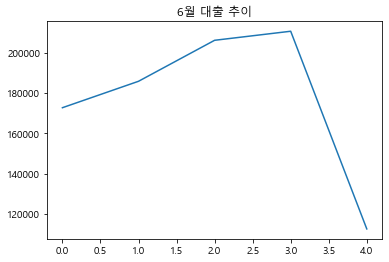

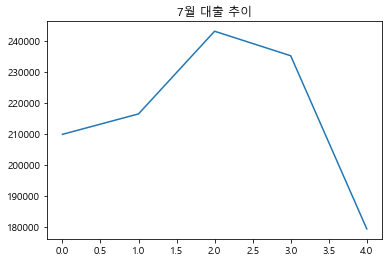

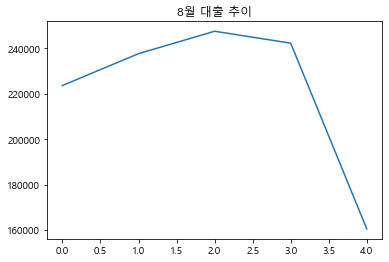

In [32]:
year_data=pd.DataFrame(result3)

for i in range(7):
    plt.title(str(i+2)+'월 대출 추이')
    plt.plot(year_data[i])
    plt.show()


In [52]:
import requests
import xmltodict
import re

url3='http://data4library.kr/api/loanItemSrch?authKey=35c3bfc58502e41b21e1c4ac301a8056cbf1902fccd78698b85a20c2bbbb3fdb&'
#결과 저장할 폴더
m_cnt=0 #월별 대출수
w_cnt=0 #주별 대출수
idx=1 #주 확인용 인덱스
result=[] #결과 값 저장
result3_a=[]
x=['03','05','07','08']
y=['04','06']
startDt=['2020','-','02','-','01'] #시작날짜
endDt=['2020','-','02','-','07'] #종료날짜
    
while True:
    str_startDt="".join(startDt)
    str_endDt="".join(endDt)
    new_url3=url3+'startDt='+str_startDt+'&endDt='+str_endDt+'&kdc=0'

    print(str_startDt,str_endDt) #시작날,종료날 확인
    req=requests.get(new_url3).content
    xmlObject=xmltodict.parse(req)
    data=xmlObject['response']['docs']['doc']

    for i in range(len(data)):
        loan_cnt=data[i]['loan_count'].replace(',','') #int로 바꾸기 위해 , 제거
        w_cnt+=int(loan_cnt)
        #print(total_cnt) 1주일 동안 대출된 도서 수

    if (startDt[2]=='02') and (idx == 5): #2월 29일
        temp=result[3][1] #2월 넷째주 대출수
        w_cnt+=temp
        result[3]=[startDt[2]+'-'+str(idx-1),w_cnt] #2월 넷째주에 합치기
            #print(result)

    else:
        result.append([startDt[2]+'-'+str(idx),w_cnt])
            #print(result)
    m_cnt+=w_cnt
    w_cnt=0 #대출수 초기화

    if str_endDt == '2020-08-31': #전체 프로그램 종료조건
        result3_a.append(m_cnt)
        m_cnt=0
        break

    if idx == 4: #2월과 2월이 아닌 달 구분
        if startDt[2] == '02': #2월
            year=int(startDt[0])
            if ((year%4==0)and(year%100!=0))or(year%400==0): #윤년이면 29일까지 있음
                idx+=1
                startDt[4]='29'
                endDt[4]='29'
            else: #윤년이 아닌 연도는 28일까지 있으므로 3월로 넘김 
                idx=1
                startDt[2]='03'
                startDt[4]='01'
                endDt[2]='03'
                endDt[4]='07'
                result3_a.append(m_cnt)
                m_cnt=0
        else: #2월이 아닌 달 중 마지막 날이 30일인 날과 31일인 날 구분
            idx+=1
            startDt[4]='29'
            if startDt[2] in x:
                endDt[4]='31'
            if startDt[2] in y:
                endDt[4]='30'

    elif idx == 5: #다음달로 월 변경
        if startDt[2]=='02':
            idx=1
            startDt[2]='0'+str(int(startDt[2])+1)
            startDt[4]='01'
            endDt[2]=startDt[2]
            endDt[4]='07'
            result3_a.append(m_cnt)
            m_cnt=0
            
        else:
            idx=1
            startDt[2]='0'+str(int(startDt[2])+1)
            startDt[4]='01'
            endDt[2]=startDt[2]
            endDt[4]='07'
            result3_a.append(m_cnt)
            m_cnt=0

    else: # 일 변경
        startDt[4]=str(int(startDt[4])+7)
        endDt[4]=str(int(endDt[4])+7)
        if idx == 1: #계산을 위해 int로 변환하면서 앞에 0이 없어졌기 때문에 다시 붙여준다
            startDt[4]='0'+startDt[4] #시작 일이 8일일 때 
        idx+=1
        
idx=1
    

print(np.array(result3_a)/np.array(result3[4]))

2020-02-01 2020-02-07
2020-02-08 2020-02-14
2020-02-15 2020-02-21
2020-02-22 2020-02-28
2020-02-29 2020-02-29
2020-03-01 2020-03-07
2020-03-08 2020-03-14
2020-03-15 2020-03-21
2020-03-22 2020-03-28
2020-03-29 2020-03-31
2020-04-01 2020-04-07
2020-04-08 2020-04-14
2020-04-15 2020-04-21
2020-04-22 2020-04-28
2020-04-29 2020-04-30
2020-05-01 2020-05-07
2020-05-08 2020-05-14
2020-05-15 2020-05-21
2020-05-22 2020-05-28
2020-05-29 2020-05-31
2020-06-01 2020-06-07
2020-06-08 2020-06-14
2020-06-15 2020-06-21
2020-06-22 2020-06-28
2020-06-29 2020-06-30
2020-07-01 2020-07-07
2020-07-08 2020-07-14
2020-07-15 2020-07-21
2020-07-22 2020-07-28
2020-07-29 2020-07-31
2020-08-01 2020-08-07
2020-08-08 2020-08-14
2020-08-15 2020-08-21
2020-08-22 2020-08-28
2020-08-29 2020-08-31
[0.17006123 0.15899159 0.14454386 0.16503745 0.14197641 0.14964177
 0.15949052]


In [53]:
import requests
import xmltodict
import re

url3='http://data4library.kr/api/loanItemSrch?authKey=35c3bfc58502e41b21e1c4ac301a8056cbf1902fccd78698b85a20c2bbbb3fdb&'
#결과 저장할 폴더
m_cnt=0 #월별 대출수
w_cnt=0 #주별 대출수
idx=1 #주 확인용 인덱스
result=[] #결과 값 저장
result3_b=[]
x=['03','05','07','08']
y=['04','06']
startDt=['2020','-','02','-','01'] #시작날짜
endDt=['2020','-','02','-','07'] #종료날짜
    
while True:
    str_startDt="".join(startDt)
    str_endDt="".join(endDt)
    new_url3=url3+'startDt='+str_startDt+'&endDt='+str_endDt+'&kdc=1'

    print(str_startDt,str_endDt) #시작날,종료날 확인
    req=requests.get(new_url3).content
    xmlObject=xmltodict.parse(req)
    data=xmlObject['response']['docs']['doc']

    for i in range(len(data)):
        loan_cnt=data[i]['loan_count'].replace(',','') #int로 바꾸기 위해 , 제거
        w_cnt+=int(loan_cnt)
        #print(total_cnt) 1주일 동안 대출된 도서 수

    if (startDt[2]=='02') and (idx == 5): #2월 29일
        temp=result[3][1] #2월 넷째주 대출수
        w_cnt+=temp
        result[3]=[startDt[2]+'-'+str(idx-1),w_cnt] #2월 넷째주에 합치기
            #print(result)

    else:
        result.append([startDt[2]+'-'+str(idx),w_cnt])
            #print(result)
    m_cnt+=w_cnt
    w_cnt=0 #대출수 초기화

    if str_endDt == '2020-08-31': #전체 프로그램 종료조건
        result3_b.append(m_cnt)
        m_cnt=0
        break

    if idx == 4: #2월과 2월이 아닌 달 구분
        if startDt[2] == '02': #2월
            year=int(startDt[0])
            if ((year%4==0)and(year%100!=0))or(year%400==0): #윤년이면 29일까지 있음
                idx+=1
                startDt[4]='29'
                endDt[4]='29'
            else: #윤년이 아닌 연도는 28일까지 있으므로 3월로 넘김 
                idx=1
                startDt[2]='03'
                startDt[4]='01'
                endDt[2]='03'
                endDt[4]='07'
                result3_b.append(m_cnt)
                m_cnt=0
        else: #2월이 아닌 달 중 마지막 날이 30일인 날과 31일인 날 구분
            idx+=1
            startDt[4]='29'
            if startDt[2] in x:
                endDt[4]='31'
            if startDt[2] in y:
                endDt[4]='30'

    elif idx == 5: #다음달로 월 변경
        if startDt[2]=='02':
            idx=1
            startDt[2]='0'+str(int(startDt[2])+1)
            startDt[4]='01'
            endDt[2]=startDt[2]
            endDt[4]='07'
            result3_b.append(m_cnt)
            m_cnt=0
            
        else:
            idx=1
            startDt[2]='0'+str(int(startDt[2])+1)
            startDt[4]='01'
            endDt[2]=startDt[2]
            endDt[4]='07'
            result3_b.append(m_cnt)
            m_cnt=0

    else: # 일 변경
        startDt[4]=str(int(startDt[4])+7)
        endDt[4]=str(int(endDt[4])+7)
        if idx == 1: #계산을 위해 int로 변환하면서 앞에 0이 없어졌기 때문에 다시 붙여준다
            startDt[4]='0'+startDt[4] #시작 일이 8일일 때 
        idx+=1
        
idx=1
    

print(np.array(result3_b)/np.array(result3[4]))

2020-02-01 2020-02-07
2020-02-08 2020-02-14
2020-02-15 2020-02-21
2020-02-22 2020-02-28
2020-02-29 2020-02-29
2020-03-01 2020-03-07
2020-03-08 2020-03-14
2020-03-15 2020-03-21
2020-03-22 2020-03-28
2020-03-29 2020-03-31
2020-04-01 2020-04-07
2020-04-08 2020-04-14
2020-04-15 2020-04-21
2020-04-22 2020-04-28
2020-04-29 2020-04-30
2020-05-01 2020-05-07
2020-05-08 2020-05-14
2020-05-15 2020-05-21
2020-05-22 2020-05-28
2020-05-29 2020-05-31
2020-06-01 2020-06-07
2020-06-08 2020-06-14
2020-06-15 2020-06-21
2020-06-22 2020-06-28
2020-06-29 2020-06-30
2020-07-01 2020-07-07
2020-07-08 2020-07-14
2020-07-15 2020-07-21
2020-07-22 2020-07-28
2020-07-29 2020-07-31
2020-08-01 2020-08-07
2020-08-08 2020-08-14
2020-08-15 2020-08-21
2020-08-22 2020-08-28
2020-08-29 2020-08-31
[0.26046396 0.29233585 0.2771811  0.26891952 0.24769028 0.24166597
 0.24467005]


In [55]:
import requests
import xmltodict
import re

url3='http://data4library.kr/api/loanItemSrch?authKey=35c3bfc58502e41b21e1c4ac301a8056cbf1902fccd78698b85a20c2bbbb3fdb&'
#결과 저장할 폴더
m_cnt=0 #월별 대출수
w_cnt=0 #주별 대출수
idx=1 #주 확인용 인덱스
result=[] #결과 값 저장
result3_c=[]
x=['03','05','07','08']
y=['04','06']
startDt=['2020','-','02','-','01'] #시작날짜
endDt=['2020','-','02','-','07'] #종료날짜
    
while True:
    str_startDt="".join(startDt)
    str_endDt="".join(endDt)
    new_url3=url3+'startDt='+str_startDt+'&endDt='+str_endDt+'&kdc=2'

    print(str_startDt,str_endDt) #시작날,종료날 확인
    req=requests.get(new_url3).content
    xmlObject=xmltodict.parse(req)
    data=xmlObject['response']['docs']['doc']

    for i in range(len(data)):
        loan_cnt=data[i]['loan_count'].replace(',','') #int로 바꾸기 위해 , 제거
        w_cnt+=int(loan_cnt)
        #print(total_cnt) 1주일 동안 대출된 도서 수

    if (startDt[2]=='02') and (idx == 5): #2월 29일
        temp=result[3][1] #2월 넷째주 대출수
        w_cnt+=temp
        result[3]=[startDt[2]+'-'+str(idx-1),w_cnt] #2월 넷째주에 합치기
            #print(result)

    else:
        result.append([startDt[2]+'-'+str(idx),w_cnt])
            #print(result)
    m_cnt+=w_cnt
    w_cnt=0 #대출수 초기화

    if str_endDt == '2020-08-31': #전체 프로그램 종료조건
        result3_c.append(m_cnt)
        m_cnt=0
        break

    if idx == 4: #2월과 2월이 아닌 달 구분
        if startDt[2] == '02': #2월
            year=int(startDt[0])
            if ((year%4==0)and(year%100!=0))or(year%400==0): #윤년이면 29일까지 있음
                idx+=1
                startDt[4]='29'
                endDt[4]='29'
            else: #윤년이 아닌 연도는 28일까지 있으므로 3월로 넘김 
                idx=1
                startDt[2]='03'
                startDt[4]='01'
                endDt[2]='03'
                endDt[4]='07'
                result3_c.append(m_cnt)
                m_cnt=0
        else: #2월이 아닌 달 중 마지막 날이 30일인 날과 31일인 날 구분
            idx+=1
            startDt[4]='29'
            if startDt[2] in x:
                endDt[4]='31'
            if startDt[2] in y:
                endDt[4]='30'

    elif idx == 5: #다음달로 월 변경
        if startDt[2]=='02':
            idx=1
            startDt[2]='0'+str(int(startDt[2])+1)
            startDt[4]='01'
            endDt[2]=startDt[2]
            endDt[4]='07'
            result3_c.append(m_cnt)
            m_cnt=0
            
        else:
            idx=1
            startDt[2]='0'+str(int(startDt[2])+1)
            startDt[4]='01'
            endDt[2]=startDt[2]
            endDt[4]='07'
            result3_c.append(m_cnt)
            m_cnt=0

    else: # 일 변경
        startDt[4]=str(int(startDt[4])+7)
        endDt[4]=str(int(endDt[4])+7)
        if idx == 1: #계산을 위해 int로 변환하면서 앞에 0이 없어졌기 때문에 다시 붙여준다
            startDt[4]='0'+startDt[4] #시작 일이 8일일 때 
        idx+=1
        
idx=1
    

print(np.array(result3_c)/np.array(result3[4]))

2020-02-01 2020-02-07
2020-02-08 2020-02-14
2020-02-15 2020-02-21
2020-02-22 2020-02-28
2020-02-29 2020-02-29
2020-03-01 2020-03-07
2020-03-08 2020-03-14
2020-03-15 2020-03-21
2020-03-22 2020-03-28
2020-03-29 2020-03-31
2020-04-01 2020-04-07
2020-04-08 2020-04-14
2020-04-15 2020-04-21
2020-04-22 2020-04-28
2020-04-29 2020-04-30
2020-05-01 2020-05-07
2020-05-08 2020-05-14
2020-05-15 2020-05-21
2020-05-22 2020-05-28
2020-05-29 2020-05-31
2020-06-01 2020-06-07
2020-06-08 2020-06-14
2020-06-15 2020-06-21
2020-06-22 2020-06-28
2020-06-29 2020-06-30
2020-07-01 2020-07-07
2020-07-08 2020-07-14
2020-07-15 2020-07-21
2020-07-22 2020-07-28
2020-07-29 2020-07-31
2020-08-01 2020-08-07
2020-08-08 2020-08-14
2020-08-15 2020-08-21
2020-08-22 2020-08-28
2020-08-29 2020-08-31
[0.12869745 0.10422812 0.10348948 0.13844102 0.12805593 0.13547434
 0.14536452]


In [56]:
import requests
import xmltodict
import re

url3='http://data4library.kr/api/loanItemSrch?authKey=35c3bfc58502e41b21e1c4ac301a8056cbf1902fccd78698b85a20c2bbbb3fdb&'
#결과 저장할 폴더
m_cnt=0 #월별 대출수
w_cnt=0 #주별 대출수
idx=1 #주 확인용 인덱스
result=[] #결과 값 저장
result3_d=[]
x=['03','05','07','08']
y=['04','06']
startDt=['2020','-','02','-','01'] #시작날짜
endDt=['2020','-','02','-','07'] #종료날짜
    
while True:
    str_startDt="".join(startDt)
    str_endDt="".join(endDt)
    new_url3=url3+'startDt='+str_startDt+'&endDt='+str_endDt+'&kdc=3'

    print(str_startDt,str_endDt) #시작날,종료날 확인
    req=requests.get(new_url3).content
    xmlObject=xmltodict.parse(req)
    data=xmlObject['response']['docs']['doc']

    for i in range(len(data)):
        loan_cnt=data[i]['loan_count'].replace(',','') #int로 바꾸기 위해 , 제거
        w_cnt+=int(loan_cnt)
        #print(total_cnt) 1주일 동안 대출된 도서 수

    if (startDt[2]=='02') and (idx == 5): #2월 29일
        temp=result[3][1] #2월 넷째주 대출수
        w_cnt+=temp
        result[3]=[startDt[2]+'-'+str(idx-1),w_cnt] #2월 넷째주에 합치기
            #print(result)

    else:
        result.append([startDt[2]+'-'+str(idx),w_cnt])
            #print(result)
    m_cnt+=w_cnt
    w_cnt=0 #대출수 초기화

    if str_endDt == '2020-08-31': #전체 프로그램 종료조건
        result3_d.append(m_cnt)
        m_cnt=0
        break

    if idx == 4: #2월과 2월이 아닌 달 구분
        if startDt[2] == '02': #2월
            year=int(startDt[0])
            if ((year%4==0)and(year%100!=0))or(year%400==0): #윤년이면 29일까지 있음
                idx+=1
                startDt[4]='29'
                endDt[4]='29'
            else: #윤년이 아닌 연도는 28일까지 있으므로 3월로 넘김 
                idx=1
                startDt[2]='03'
                startDt[4]='01'
                endDt[2]='03'
                endDt[4]='07'
                result3_d.append(m_cnt)
                m_cnt=0
        else: #2월이 아닌 달 중 마지막 날이 30일인 날과 31일인 날 구분
            idx+=1
            startDt[4]='29'
            if startDt[2] in x:
                endDt[4]='31'
            if startDt[2] in y:
                endDt[4]='30'

    elif idx == 5: #다음달로 월 변경
        if startDt[2]=='02':
            idx=1
            startDt[2]='0'+str(int(startDt[2])+1)
            startDt[4]='01'
            endDt[2]=startDt[2]
            endDt[4]='07'
            result3_d.append(m_cnt)
            m_cnt=0
            
        else:
            idx=1
            startDt[2]='0'+str(int(startDt[2])+1)
            startDt[4]='01'
            endDt[2]=startDt[2]
            endDt[4]='07'
            result3_d.append(m_cnt)
            m_cnt=0

    else: # 일 변경
        startDt[4]=str(int(startDt[4])+7)
        endDt[4]=str(int(endDt[4])+7)
        if idx == 1: #계산을 위해 int로 변환하면서 앞에 0이 없어졌기 때문에 다시 붙여준다
            startDt[4]='0'+startDt[4] #시작 일이 8일일 때 
        idx+=1
        
idx=1
    

print(np.array(result3_d)/np.array(result3[4]))

2020-02-01 2020-02-07
2020-02-08 2020-02-14
2020-02-15 2020-02-21
2020-02-22 2020-02-28
2020-02-29 2020-02-29
2020-03-01 2020-03-07
2020-03-08 2020-03-14
2020-03-15 2020-03-21
2020-03-22 2020-03-28
2020-03-29 2020-03-31
2020-04-01 2020-04-07
2020-04-08 2020-04-14
2020-04-15 2020-04-21
2020-04-22 2020-04-28
2020-04-29 2020-04-30
2020-05-01 2020-05-07
2020-05-08 2020-05-14
2020-05-15 2020-05-21
2020-05-22 2020-05-28
2020-05-29 2020-05-31
2020-06-01 2020-06-07
2020-06-08 2020-06-14
2020-06-15 2020-06-21
2020-06-22 2020-06-28
2020-06-29 2020-06-30
2020-07-01 2020-07-07
2020-07-08 2020-07-14
2020-07-15 2020-07-21
2020-07-22 2020-07-28
2020-07-29 2020-07-31
2020-08-01 2020-08-07
2020-08-08 2020-08-14
2020-08-15 2020-08-21
2020-08-22 2020-08-28
2020-08-29 2020-08-31
[0.36916943 0.38689501 0.38105467 0.4206998  0.40488416 0.40233057
 0.41101803]


In [57]:
import requests
import xmltodict
import re

url3='http://data4library.kr/api/loanItemSrch?authKey=35c3bfc58502e41b21e1c4ac301a8056cbf1902fccd78698b85a20c2bbbb3fdb&'
#결과 저장할 폴더
m_cnt=0 #월별 대출수
w_cnt=0 #주별 대출수
idx=1 #주 확인용 인덱스
result=[] #결과 값 저장
result3_e=[]
x=['03','05','07','08']
y=['04','06']
startDt=['2020','-','02','-','01'] #시작날짜
endDt=['2020','-','02','-','07'] #종료날짜
    
while True:
    str_startDt="".join(startDt)
    str_endDt="".join(endDt)
    new_url3=url3+'startDt='+str_startDt+'&endDt='+str_endDt+'&kdc=4'

    print(str_startDt,str_endDt) #시작날,종료날 확인
    req=requests.get(new_url3).content
    xmlObject=xmltodict.parse(req)
    data=xmlObject['response']['docs']['doc']

    for i in range(len(data)):
        loan_cnt=data[i]['loan_count'].replace(',','') #int로 바꾸기 위해 , 제거
        w_cnt+=int(loan_cnt)
        #print(total_cnt) 1주일 동안 대출된 도서 수

    if (startDt[2]=='02') and (idx == 5): #2월 29일
        temp=result[3][1] #2월 넷째주 대출수
        w_cnt+=temp
        result[3]=[startDt[2]+'-'+str(idx-1),w_cnt] #2월 넷째주에 합치기
            #print(result)

    else:
        result.append([startDt[2]+'-'+str(idx),w_cnt])
            #print(result)
    m_cnt+=w_cnt
    w_cnt=0 #대출수 초기화

    if str_endDt == '2020-08-31': #전체 프로그램 종료조건
        result3_e.append(m_cnt)
        m_cnt=0
        break

    if idx == 4: #2월과 2월이 아닌 달 구분
        if startDt[2] == '02': #2월
            year=int(startDt[0])
            if ((year%4==0)and(year%100!=0))or(year%400==0): #윤년이면 29일까지 있음
                idx+=1
                startDt[4]='29'
                endDt[4]='29'
            else: #윤년이 아닌 연도는 28일까지 있으므로 3월로 넘김 
                idx=1
                startDt[2]='03'
                startDt[4]='01'
                endDt[2]='03'
                endDt[4]='07'
                result3_e.append(m_cnt)
                m_cnt=0
        else: #2월이 아닌 달 중 마지막 날이 30일인 날과 31일인 날 구분
            idx+=1
            startDt[4]='29'
            if startDt[2] in x:
                endDt[4]='31'
            if startDt[2] in y:
                endDt[4]='30'

    elif idx == 5: #다음달로 월 변경
        if startDt[2]=='02':
            idx=1
            startDt[2]='0'+str(int(startDt[2])+1)
            startDt[4]='01'
            endDt[2]=startDt[2]
            endDt[4]='07'
            result3_e.append(m_cnt)
            m_cnt=0
            
        else:
            idx=1
            startDt[2]='0'+str(int(startDt[2])+1)
            startDt[4]='01'
            endDt[2]=startDt[2]
            endDt[4]='07'
            result3_e.append(m_cnt)
            m_cnt=0

    else: # 일 변경
        startDt[4]=str(int(startDt[4])+7)
        endDt[4]=str(int(endDt[4])+7)
        if idx == 1: #계산을 위해 int로 변환하면서 앞에 0이 없어졌기 때문에 다시 붙여준다
            startDt[4]='0'+startDt[4] #시작 일이 8일일 때 
        idx+=1
        
idx=1
    

print(np.array(result3_e)/np.array(result3[4]))

2020-02-01 2020-02-07
2020-02-08 2020-02-14
2020-02-15 2020-02-21
2020-02-22 2020-02-28
2020-02-29 2020-02-29
2020-03-01 2020-03-07
2020-03-08 2020-03-14
2020-03-15 2020-03-21
2020-03-22 2020-03-28
2020-03-29 2020-03-31
2020-04-01 2020-04-07
2020-04-08 2020-04-14
2020-04-15 2020-04-21
2020-04-22 2020-04-28
2020-04-29 2020-04-30
2020-05-01 2020-05-07
2020-05-08 2020-05-14
2020-05-15 2020-05-21
2020-05-22 2020-05-28
2020-05-29 2020-05-31
2020-06-01 2020-06-07
2020-06-08 2020-06-14
2020-06-15 2020-06-21
2020-06-22 2020-06-28
2020-06-29 2020-06-30
2020-07-01 2020-07-07
2020-07-08 2020-07-14
2020-07-15 2020-07-21
2020-07-22 2020-07-28
2020-07-29 2020-07-31
2020-08-01 2020-08-07
2020-08-08 2020-08-14
2020-08-15 2020-08-21
2020-08-22 2020-08-28
2020-08-29 2020-08-31
[0.40363417 0.38473724 0.33830747 0.46964463 0.42687087 0.45226506
 0.50935816]
